In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd

Using TensorFlow backend.


### Importar a base de dados

In [2]:
base = pd.read_csv('../../data/acoesPetrobras/base_treinamento.csv')

In [3]:
base[:20]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
5,2013-01-09,19.639999,19.870001,19.459999,19.680000,18.077084,24361100.0
6,2013-01-10,19.770000,20.049999,19.540001,19.830000,18.214869,17526200.0
7,2013-01-11,19.850000,20.040001,19.700001,19.879999,18.260794,18223600.0
8,2013-01-14,20.010000,20.240000,19.690001,19.719999,18.113827,28302400.0
9,2013-01-15,20.010000,20.240000,19.690001,19.820000,18.205681,29633900.0


### remover colunas com valores nulos

In [4]:
base = base.dropna()

### Extrair colunas para treinamento

In [5]:
base_treinamento = base.iloc[:,1:2].values

In [6]:
base_treinamento

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

#### Normalizar a base de dados para uma escala de 0 a 1

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [9]:
base_treinamento_normalizada

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

#### Utilizar 90 datas anteriores para prever um valor

In [46]:
previsores = []
preco_real = []

In [47]:
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i,0])
    preco_real.append(base_treinamento_normalizada[i,0])

In [48]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [49]:
previsores = np.reshape(previsores,(previsores.shape[0], previsores.shape[1], 1))

#### Estrutura da Rede Neural

In [33]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [34]:
regressor.fit(previsores, preco_real, epochs=100, batch_size=32)

Epoch 1/100
1152/1152 [==============================] - 14s 12ms/step - loss: 0.0452 - mean_absolute_error: 0.1505
Epoch 2/100
1152/1152 [==============================] - 11s 9ms/step - loss: 0.0197 - mean_absolute_error: 0.1090
Epoch 3/100
1152/1152 [==============================] - 11s 10ms/step - loss: 0.0153 - mean_absolute_error: 0.0954
Epoch 4/100
1152/1152 [==============================] - 12s 11ms/step - loss: 0.0135 - mean_absolute_error: 0.0896
Epoch 5/100
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0114 - mean_absolute_error: 0.0844
Epoch 6/100
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0111 - mean_absolute_error: 0.0814
Epoch 7/100
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0093 - mean_absolute_error: 0.0750
Epoch 8/100
1152/1152 [==============================] - 12s 10ms/step - loss: 0.0086 - mean_absolute_error: 0.0724
Epoch 9/100
1152/1152 [==============================] - 13s 11ms/step - 

1152/1152 [==============================] - 17s 15ms/step - loss: 0.0021 - mean_absolute_error: 0.0341
Epoch 72/100
1152/1152 [==============================] - 19s 17ms/step - loss: 0.0021 - mean_absolute_error: 0.0344
Epoch 73/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0019 - mean_absolute_error: 0.0323
Epoch 74/100
1152/1152 [==============================] - 19s 17ms/step - loss: 0.0019 - mean_absolute_error: 0.0342
Epoch 75/100
1152/1152 [==============================] - 17s 15ms/step - loss: 0.0020 - mean_absolute_error: 0.0335
Epoch 76/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0018 - mean_absolute_error: 0.0324
Epoch 77/100
1152/1152 [==============================] - 19s 16ms/step - loss: 0.0019 - mean_absolute_error: 0.0329
Epoch 78/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0019 - mean_absolute_error: 0.0324
Epoch 79/100
1152/1152 [==============================] - 15s 13ms/step - los

#### Realizar as previsões para a base de teste

In [35]:
base_teste = pd.read_csv('../../data/acoesPetrobras/base_teste.csv')

In [36]:
preco_real_teste = base_teste.iloc[:,1:2].values

In [38]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis=0)

In [39]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [40]:
entradas = entradas.reshape(-1,1)

In [41]:
entradas = normalizador.transform(entradas)

In [43]:
x_teste = []
for i in range(90, 112):
    x_teste.append(entradas[i-90: i,0])
x_teste = np.array(x_teste)
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

In [50]:
previsoes = regressor.predict(x_teste)

In [60]:
previsoes = normalizador.inverse_transform(previsoes)

In [63]:
for i in range(len(preco_real_teste)):
    print('preco real:',preco_real_teste[i], 'previsao:', previsoes[i])

preco real: [338.36162064] previsao: [347.548]
preco real: [344.5536] previsao: [348.6551]
preco real: [350.53922064] previsao: [353.04623]
preco real: [348.88802064] previsao: [359.24213]
preco real: [349.7136] previsao: [360.6515]
preco real: [355.69922064] previsao: [360.62106]
preco real: [353.4288] previsao: [364.4563]
preco real: [352.60317936] previsao: [365.44876]
preco real: [355.90562064] previsao: [364.4999]
preco real: [361.6848] previsao: [365.9681]
preco real: [362.304] previsao: [370.88174]
preco real: [374.0688] previsao: [373.598]
preco real: [382.944] previsao: [381.48505]
preco real: [382.11837936] previsao: [391.12216]
preco real: [381.0864] previsao: [393.82852]
preco real: [383.976] previsao: [392.78503]
preco real: [384.3888] previsao: [394.05887]
preco real: [403.3776] previsao: [395.48767]
preco real: [409.15682064] previsao: [408.3868]
preco real: [410.1888] previsao: [417.9025]
preco real: [412.2528] previsao: [420.1845]
preco real: [411.6336] previsao: [421.

In [70]:
import matplotlib.pyplot as plt

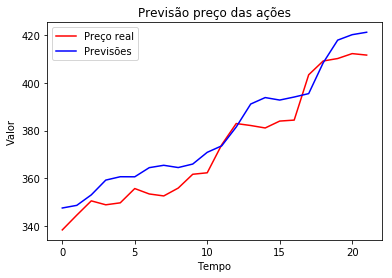

In [71]:
plt.plot(preco_real_teste, color = 'red', label='Preço real')
plt.plot(previsoes, color='blue', label='Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()